In [1]:
#libraries
import math
import itertools
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
from sklearn.cluster import KMeans

In [2]:
cryptos = np.loadtxt('data/cryptos.csv', dtype='str')

In [3]:
cryptos

array(['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD', 'DOGE-USD',
       'TRX-USD', 'ETC-USD', 'LTC-USD', 'LINK-USD', 'XLM-USD', 'XMR-USD',
       'BCH-USD', 'VET-USD', 'FIL-USD', 'XTZ-USD', 'MANA-USD', 'QNT-USD',
       'EOS-USD', 'THETA-USD', 'KCS-USD', 'ZEC-USD', 'MIOTA-USD',
       'HT-USD', 'MKR-USD', 'NEO-USD', 'SNX-USD', 'NEXO-USD', 'ENJ-USD',
       'BAT-USD', 'DASH-USD', 'WAVES-USD', 'ZIL-USD', 'RVN-USD',
       'LRC-USD', 'CEL-USD', 'BTG-USD', 'XEM-USD', 'DCR-USD', 'HOT1-USD',
       'XDC-USD', 'GNO-USD', 'QTUM-USD', 'IOTX-USD', 'GLM-USD',
       'FLUX-USD', 'RPL-USD', 'OMG-USD', 'ZRX-USD', 'IOST-USD', 'ICX-USD',
       'ONT-USD', 'STORJ-USD', 'WAXP-USD', 'SC-USD', 'POLY-USD',
       'VGX-USD', 'ZEN-USD', 'ERG-USD', 'CHSB-USD', 'DGB-USD', 'CVC-USD',
       'MED-USD', 'LSK-USD', 'EURS-USD', 'CEEK-USD', 'SYS-USD', 'REN-USD',
       'SNT-USD', 'MAID-USD', 'ONG1-USD', 'XNO-USD', 'MVL-USD', 'REQ-USD',
       'RLC-USD', 'ARDR-USD', 'DENT-USD', 'POWR-USD', 'UQC-USD',
       

# Get all R matrices for Cryptos

In [5]:
def analysisdata(symbols, startdate, enddate, tinterval):
    series = dict()
    for i in symbols:
        series[i] = get_data(i, start_date=startdate, end_date=enddate, index_as_date=True, interval=tinterval)['close']
    return series

In [6]:
# get n R matrices for our crypto symbols, input a start/end date as a string 'mdy', input epoch in integer days
# function calculates number n of matrices it will make (be careful must check it is an integer beforehand)
# initializes an empty array
# loops through starting at the original start date and gives a dictionary which we turn into a dataframe
# once a dataframe we perform some math operators and drop the first row (returns NaN values)
# then becomes R dataframe (matrix) and we append it to our array
# Does this for the entire data time and then returns the list of all the matrices
# note; here we make our R matrix have 1 day time intervals between data points 
# (not 1wk like we did above to determine symbols)
# note; yahoo fin requires at least a 1 month interval to pull data for some reason?
def rmatrices(startdate, enddate, epoch, cryptosymbols):
    n = int((datetime.strptime(enddate, '%m%d%y') - datetime.strptime(startdate, '%m%d%y')).days/epoch)
    matrices = list()
    print('expected number of matrices:', n)
    for i in range(n):
        tempdict = analysisdata(cryptosymbols, datetime.strftime(datetime.strptime(startdate, '%m%d%y') + timedelta(days=(i*epoch)), '%m%d%y'), datetime.strftime(datetime.strptime(startdate, '%m%d%y') + timedelta(days=((i+1)*epoch)), '%m%d%y'), tinterval= '1d')
        tempdf = pd.DataFrame.from_dict(tempdict)
        tempdftwo = np.log(tempdf).diff()
        r = tempdftwo.drop(index=tempdftwo.index[0])
        matrices.append(r)
    return matrices

In [7]:
# generate all R matrices in a list
rmatrix = rmatrices('100118','103118',10, cryptos)

expected number of matrices: 3


In [8]:
rmatrix

[             BTC-USD   ETH-USD   BNB-USD   XRP-USD   ADA-USD  DOGE-USD  \
 2018-10-02 -0.005100 -0.015666  0.040708 -0.101471 -0.023283 -0.020058   
 2018-10-03 -0.008195 -0.029899 -0.008299  0.013966 -0.021260 -0.020820   
 2018-10-04  0.011331  0.007811 -0.001520 -0.002950  0.006354 -0.010398   
 2018-10-05  0.006938  0.023935  0.036439 -0.014499  0.020537  0.004243   
 2018-10-06 -0.005173 -0.010961 -0.025144 -0.061471 -0.020549 -0.022116   
 2018-10-07  0.002220  0.004428  0.014064 -0.012458  0.040437  0.003061   
 2018-10-08  0.007436  0.013774 -0.001179  0.015872  0.022761  0.002873   
 2018-10-09 -0.001443 -0.005568 -0.011651 -0.020409 -0.002891  0.010167   
 2018-10-10 -0.008635 -0.009754 -0.005494 -0.037086 -0.019622 -0.014839   
 2018-10-11 -0.051295 -0.175129 -0.104702 -0.188028 -0.177047 -0.104720   
 
              TRX-USD   ETC-USD   LTC-USD  LINK-USD  ...   RFR-USD   UPP-USD  \
 2018-10-02  0.001858 -0.003744 -0.008384 -0.012771  ...  0.046963 -0.031984   
 2018-10-03 -

In [9]:
# get averages of each R matrix and put them in a list
raverages = list()
for i in range(len(rmatrix)):
    raverages.append(rmatrix[i].mean().mean())
    

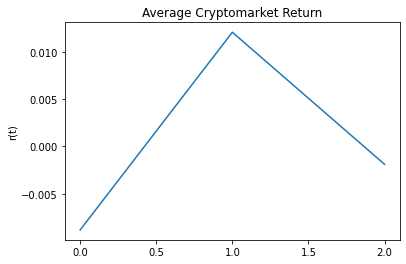

In [11]:
# going to plot r values. python will automatically plot in chronological order given how we constructed our data
labels = np.arange(2018,2022)
plt.style.use('default')
plt.plot(raverages)
plt.ylabel("r(t)")
plt.title('Average Cryptomarket Return')

plt.locator_params(axis='x', nbins=5)
plt.show()

# Getting all C matrices for Cryptos

In [12]:
# Get a Correlation Matrix for each R matrix
corrmatrix = [i.corr(method='pearson') for i in rmatrix]

In [13]:
# Get average correlation for each matrix [MIGHT NEED TO COME BACK AND DO NOISE SUPRESSION FIRST] 
# might need to subtract 1 for every mean since we have diagonals
corraverages = [i.mean().mean() for i in corrmatrix]

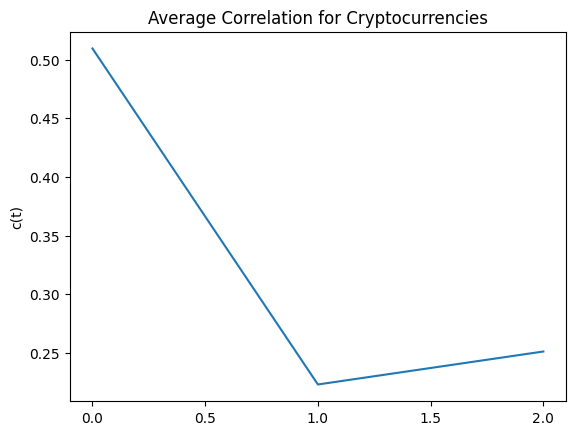

In [14]:
# Plot average correlation 
plt.style.use('default')
plt.plot(corraverages)
plt.ylabel("c(t)")
plt.title('Average Correlation for Cryptocurrencies')

plt.locator_params(axis='x', nbins=5)
plt.show()

# Noise Supression

In [15]:
# function which does power mapping for noise supresion, takes corr matrices and replaces each element by
# sign(C_ij)|C_ij|^(1+e)
def noisesupression(corrmatrices, e):
    for df in corrmatrices:
        for i,j in itertools.product(range(len(df.index)), range(len(df.columns))):
            df.iloc[i,j] = math.copysign(1,df.iloc[i,j])* abs((df.iloc[i,j]))**(1+e)
    return corrmatrices


In [20]:
# get supressed noise matrices
supcorrmatrix = noisesupression(corrmatrix, 0.2)

In [21]:
supcorrmatrix[0]

,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,TRX-USD,ETC-USD,LTC-USD,LINK-USD,...,RFR-USD,UPP-USD,BCD-USD,PIVX-USD,ELA-USD,SBD-USD,PRE-USD,MONA-USD,BLZ-USD,GRS-USD
BTC-USD,1.000000,0.972801,0.806926,0.834719,0.957267,0.928827,0.830317,0.920344,0.976529,0.806703,...,0.527847,0.579908,0.819094,0.163579,0.542723,-0.641958,0.089859,0.603128,0.851677,0.781140
ETH-USD,0.972801,1.000000,0.848536,0.814489,0.969662,0.959825,0.825281,0.966148,0.973321,0.821777,...,0.633169,0.685663,0.794669,0.113469,0.534936,-0.692017,0.063369,0.578726,0.908273,0.844326
BNB-USD,0.806926,0.848536,1.000000,0.559163,0.821686,0.798654,0.740575,0.853352,0.823631,0.790856,...,0.592956,0.696216,0.701087,0.061722,0.480761,-0.686462,-0.009465,0.478539,0.730157,0.616037
XRP-USD,0.834719,0.814489,0.559163,1.000000,0.853788,0.838945,0.650299,0.817082,0.767220,0.658296,...,0.430552,0.528366,0.686935,0.234447,0.533672,-0.589359,0.171437,0.635637,0.673518,0.714497
ADA-USD,0.957267,0.969662,0.821686,0.853788,1.000000,0.964862,0.890309,0.937457,0.953904,0.770288,...,0.540753,0.693947,0.768260,0.098465,0.553017,-0.593737,0.044550,0.598403,0.815577,0.819086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBD-USD,-0.641958,-0.692017,-0.686462,-0.589359,-0.593737,-0.576488,-0.482153,-0.799805,-0.595427,-0.496281,...,-0.578301,-0.407072,-0.813878,-0.013742,-0.405281,1.000000,-0.183708,-0.338763,-0.792919,-0.505100
PRE-USD,0.089859,0.063369,-0.009465,0.171437,0.044550,0.032244,-0.063432,0.132146,0.139234,-0.039253,...,0.313871,-0.304569,0.337901,0.423168,0.030011,-0.183708,1.000000,0.572521,0.225341,0.131786
MONA-USD,0.603128,0.578726,0.478539,0.635637,0.598403,0.634256,0.290399,0.600055,0.644542,0.451060,...,0.415680,0.201025,0.560870,0.325377,0.469611,-0.338763,0.572521,1.000000,0.548185,0.510505
BLZ-USD,0.851677,0.908273,0.730157,0.673518,0.815577,0.808407,0.649868,0.912350,0.880118,0.652096,...,0.679793,0.530423,0.822955,0.040144,0.399979,-0.792919,0.225341,0.548185,1.000000,0.753719


In [22]:
supcorrmatrix[1]

,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,TRX-USD,ETC-USD,LTC-USD,LINK-USD,...,RFR-USD,UPP-USD,BCD-USD,PIVX-USD,ELA-USD,SBD-USD,PRE-USD,MONA-USD,BLZ-USD,GRS-USD
BTC-USD,1.000000,0.839681,0.898820,0.656751,0.601029,0.330823,0.479195,0.687240,0.677628,0.238784,...,0.309884,-0.045073,0.777773,-0.057332,0.537029,0.126045,0.288879,0.540715,0.486271,0.520500
ETH-USD,0.839681,1.000000,0.863737,0.874460,0.775511,0.513540,0.736400,0.851788,0.913993,0.201002,...,0.567790,0.274709,0.876593,-0.314696,0.527300,-0.007961,0.219885,0.844948,0.489097,0.778933
BNB-USD,0.898820,0.863737,1.000000,0.629723,0.625536,0.460193,0.707472,0.806520,0.839894,0.063265,...,0.269982,0.093199,0.741624,-0.301308,0.431031,-0.069439,0.106225,0.607142,0.321021,0.456916
XRP-USD,0.656751,0.874460,0.629723,1.000000,0.840546,0.356250,0.600077,0.797514,0.824979,0.399529,...,0.455535,0.414750,0.718846,-0.214466,0.619859,0.017574,0.189384,0.849740,0.509606,0.671126
ADA-USD,0.601029,0.775511,0.625536,0.840546,1.000000,0.212291,0.447859,0.884530,0.817889,0.353484,...,0.316158,0.313202,0.675419,-0.313433,0.737139,0.098208,0.014169,0.628685,0.605188,0.577109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBD-USD,0.126045,-0.007961,-0.069439,0.017574,0.098208,0.042657,-0.374596,-0.003357,-0.100618,0.190468,...,0.070473,-0.201062,0.229522,0.031764,0.086092,1.000000,0.396297,-0.227717,0.434205,0.082234
PRE-USD,0.288879,0.219885,0.106225,0.189384,0.014169,0.311336,-0.036024,-0.008543,0.036711,-0.005562,...,0.575823,-0.188023,0.224205,-0.022709,-0.088507,0.396297,1.000000,0.063272,0.009722,0.155169
MONA-USD,0.540715,0.844948,0.607142,0.849740,0.628685,0.410235,0.808330,0.745001,0.806239,0.321983,...,0.464826,0.543767,0.677672,-0.263420,0.448583,-0.227717,0.063272,1.000000,0.424314,0.768421
BLZ-USD,0.486271,0.489097,0.321021,0.509606,0.605188,0.076786,0.245792,0.600536,0.375614,0.714581,...,0.173082,0.182243,0.688129,-0.052936,0.703250,0.434205,0.009722,0.424314,1.000000,0.646095


# Getting Similarity Matrix Elements to Use for Clustering

In [23]:
def getsimmatrix(supcorrmatrix):
    emptymat= np.ndarray(shape=(len(supcorrmatrix),len(supcorrmatrix)), dtype=float)
    print("matrix shape:",emptymat.shape)
    for i, j in itertools.product(range(len(supcorrmatrix)), range(len(supcorrmatrix))):
        emptymat[i,j] = abs(supcorrmatrix[i] - supcorrmatrix[j]).mean().mean()
    
    return emptymat

In [24]:
simmatrix = getsimmatrix(supcorrmatrix)

matrix shape: (3, 3)


# MDS Map for Similarity Matrix

In [25]:
# initialize MDS algo and fit it with our similarity matrix
# simtrans gives the new points in a reduced dimension n_components set by the MDS parameters
mds = MDS(dissimilarity = 'precomputed')
simtrans = mds.fit_transform(simmatrix)

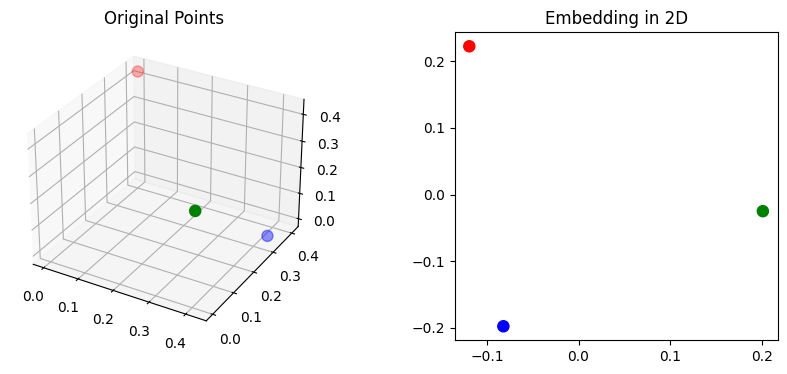

In [26]:
# simple example of what MDS is doing for a 3x3 similarity matrix (3 dimensions) into 2 dimensions
colors = ['r', 'g', 'b']
size = [64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(simmatrix[:,0], simmatrix[:,1], zs=simmatrix[:,2], s=size, c = colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(simtrans[:,0], simtrans[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

In [27]:
print(simtrans)

[[-0.11915735  0.22253211]
 [ 0.20114201 -0.02490781]
 [-0.08198467 -0.1976243 ]]


In [28]:
print(simmatrix)

[[0.         0.40592118 0.42435394]
 [0.40592118 0.         0.32701701]
 [0.42435394 0.32701701 0.        ]]


# KMeans Clustering

In [29]:
# initialize K-Means clustering algorithm
# take the MDS reduced similarity matrix and use K-means clustering on it
km = KMeans(n_clusters=2, init='random')
y_km = km.fit_predict(simtrans)

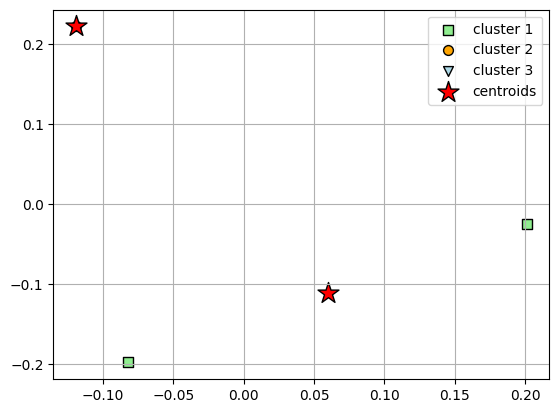

In [30]:
# plotting an example for these 3 points and doing a k=2 means clustering
plt.scatter(
    simtrans[y_km == 0, 0], simtrans[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    simtrans[y_km == 1, 0], simtrans[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    simtrans[y_km == 2, 0], simtrans[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Get Average Intracluster Distance and STD

In [38]:
# function to get the average (of averages) and std (average of std) of intra-cluster distances for a 
# similarity matrix that has been transformed by MDS
def intraclusterdist(simtrans, kclusters):
    emptydict = {}
    avgstd = {}
    totals = []
    # make dictionary with cluster as key and all distances as values (array)
    for i in range(len(simtrans)):
        emptydict.setdefault(y_km[i], []).append(math.sqrt(sum((simtrans[i] - km.cluster_centers_[y_km[i]])**2)))
    # take the dictionary from above and get a new dictionary with cluster as key
    # and a value of [# of points in cluster, average distance, std]
    for key in emptydict:
        avg = sum(emptydict[key])/len(emptydict[key])
        avgstd.setdefault(key,[]).append(len(emptydict[key]))
        avgstd.setdefault(key, []).append(avg)
        # might be an error in how I calculate std here
        std = math.sqrt(sum([(dis-avg)**2 for dis in emptydict[key]])/len(emptydict[key]))
        avgstd.setdefault(key,[]).append(std)
    # now get weighted average (of average) intracluster distance and avg std (for unequal sample size)
    avgavgdis = 0 
    avgstdcounter = 0 
    for key in avgstd:
        avgavgdis += (avgstd[key][0]*avgstd[key][1])/len(simtrans)
        avgstdcounter += (avgstd[key][0]-1)*(avgstd[key][2]**2)
    avgstd = math.sqrt(avgstdcounter/(len(simtrans)-kclusters))
    return avgavgdis, avgstd
        

In [39]:
print(intraclusterdist(simtrans,2))

(0.10956741084172224, 0.0)
